In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

In [4]:
df = pd.read_excel("/Users/emilywu/Desktop/MMA/Social Media/Dataset.xlsx", sheet_name="location")

In [5]:
df['State'] = df['Headquarters'].str.split(',').str[-1].str.strip().str.title()

In [6]:
df["State"].unique()

array(['Minnesota', 'Switzerland', 'Illinois', 'Ohio', 'Ireland',
       'California', 'Virginia', 'Connecticut', 'Georgia', 'Pennsylvania',
       'Massachusetts', 'Washington', 'Missouri', 'New York', 'Texas',
       'United Kingdom', 'Colorado', 'Arizona', 'New Jersey', 'Florida',
       'Tennessee', 'Virginia[1]', 'North Carolina', 'Wisconsin',
       'Nebraska', 'Michigan', 'Kentucky', 'California[2]', 'Louisiana',
       'Oklahoma', 'Maryland', 'Indiana', 'Rhode Island',
       'Washington D.C', 'Texas[3]', 'Delaware', 'Oregon', 'Ohio[4]',
       'Oklahoma[5]', 'Nevada', 'Idaho', 'Arkansas', 'Bermuda', 'Iowa',
       'Colorado[6]', 'Alabama', 'South Carolina', 'Texas[7]', 'Kansas',
       'Ok', 'Utah'], dtype=object)

In [34]:
B = nx.Graph()

# Add nodes with the attribute 'bipartite'
B.add_nodes_from(df['Name'], bipartite=0)  # Companies
B.add_nodes_from(df['State'].unique(), bipartite=1)  # States
B.add_nodes_from(df['Sector'].unique(), bipartite=1)


# Add edges between companies and their states and sectors
for _, row in df.iterrows():
    B.add_edge(row['Name'], row['State'])
    B.add_edge(row['Name'], row['Sector'])
    




In [32]:
# print("State Projection Nodes:", state_projection.nodes())
# print("State Projection Edges:", state_projection.edges())



State Projection Nodes: ['Minnesota', 'Switzerland', 'Illinois', 'Ohio', 'Ireland', 'California', 'Virginia', 'Connecticut', 'Georgia', 'Pennsylvania', 'Massachusetts', 'Washington', 'Missouri', 'New York', 'Texas', 'United Kingdom', 'Colorado', 'Arizona', 'New Jersey', 'Florida', 'Tennessee', 'Virginia[1]', 'North Carolina', 'Wisconsin', 'Nebraska', 'Michigan', 'Kentucky', 'California[2]', 'Louisiana', 'Oklahoma', 'Maryland', 'Indiana', 'Rhode Island', 'Washington D.C', 'Texas[3]', 'Delaware', 'Oregon', 'Ohio[4]', 'Oklahoma[5]', 'Nevada', 'Idaho', 'Arkansas', 'Bermuda', 'Iowa', 'Colorado[6]', 'Alabama', 'South Carolina', 'Texas[7]', 'Kansas', 'Ok', 'Utah', 'Materials', 'Financials', 'Health Care', 'Utilities', 'Consumer Discretionary', 'Industrials', 'Consumer Staples', 'Energy', 'Information Technology', 'Telecommunications Services']
State Projection Edges: [('Minnesota', 'Materials'), ('Minnesota', 'Financials'), ('Minnesota', 'Health Care'), ('Minnesota', 'Utilities'), ('Minnesota

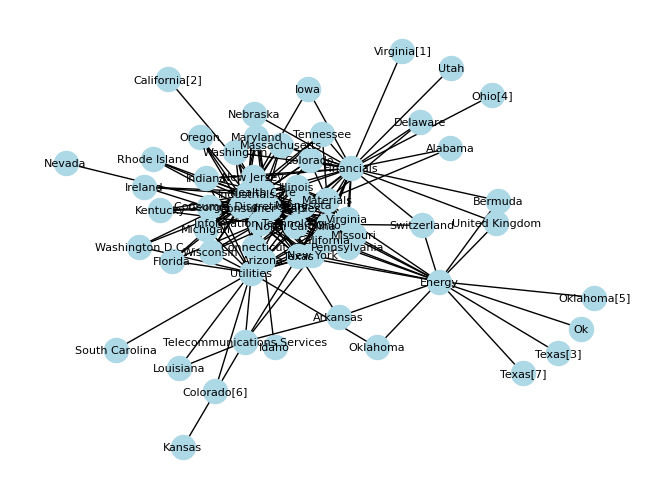

In [33]:
# nx.draw(state_projection, with_labels=True, node_color='lightblue', node_size=300, font_size=8)
# plt.show()


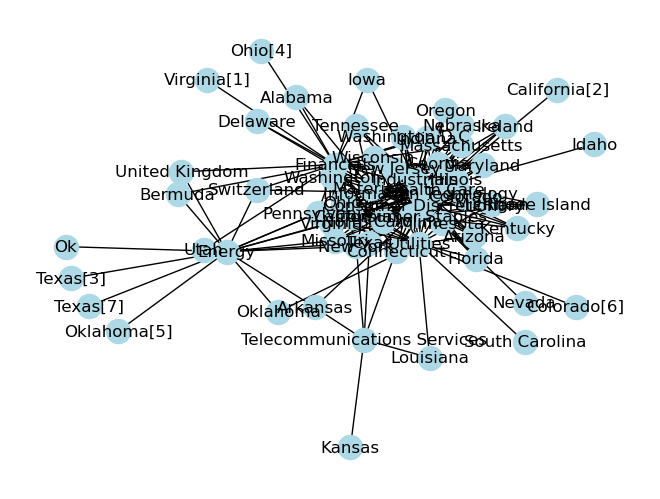

In [35]:
state_projection = bipartite.projected_graph(B, df['State'].unique())

# Draw the state projection
nx.draw(state_projection, with_labels=True, node_color='lightblue')
plt.show()



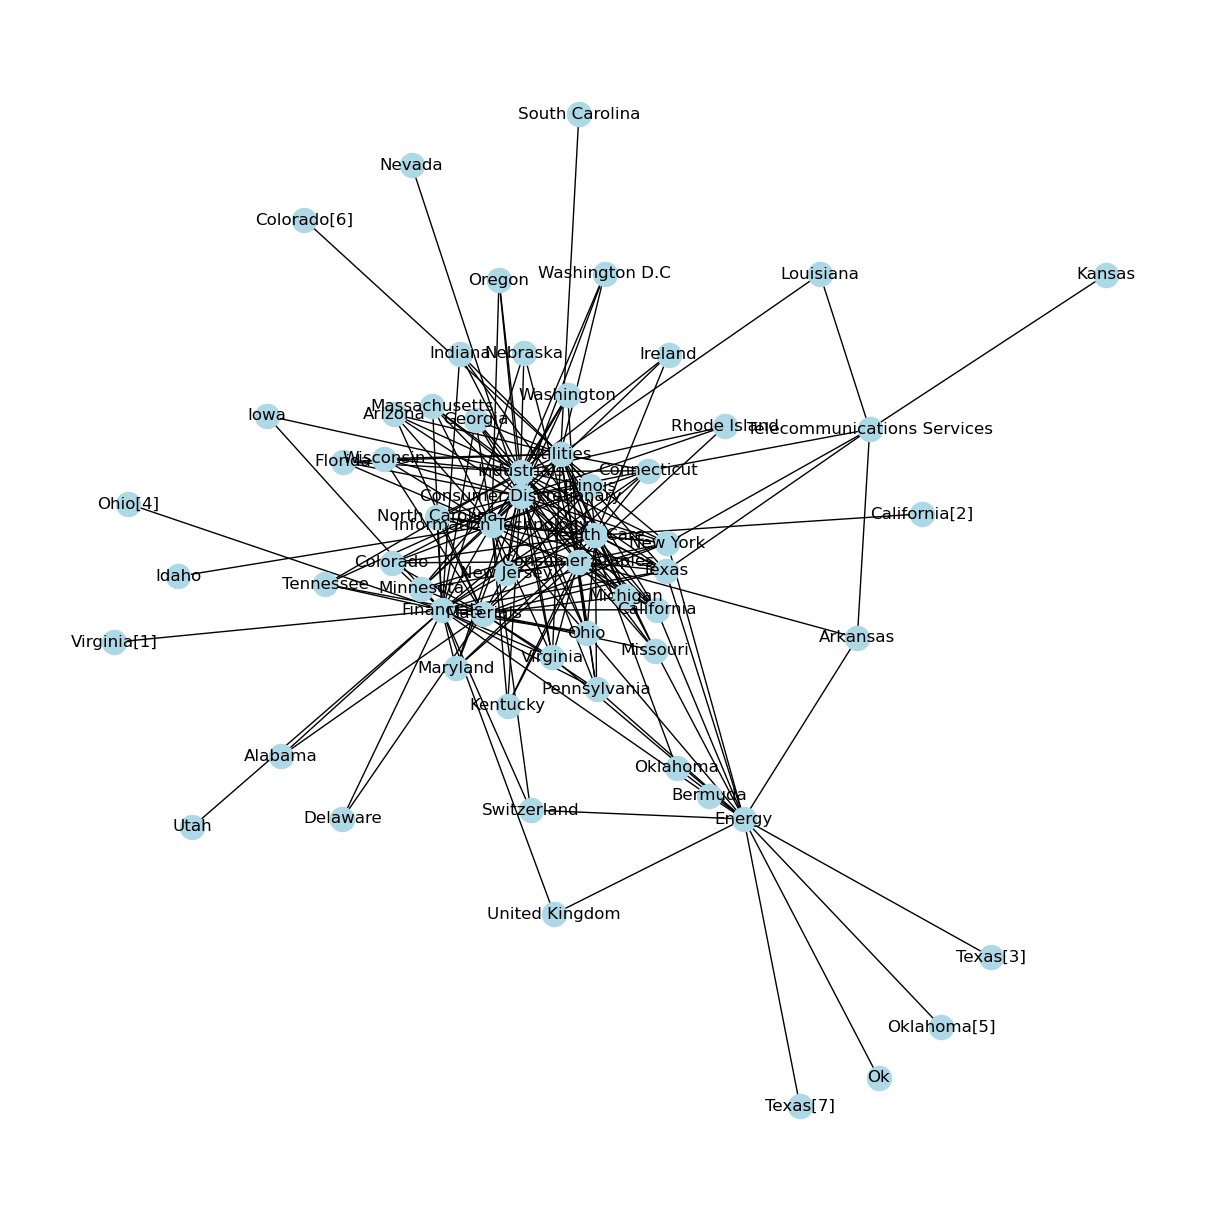

In [38]:
# Project the graph onto the sectors nodes
sector_projection = bipartite.projected_graph(B, df['Sector'].unique())


plt.figure(figsize=(12, 12))

# Use the spring_layout with adjustable parameters
pos = nx.spring_layout(sector_projection, k=0.5)
# Draw the state projection
nx.draw(sector_projection, with_labels=True, node_color='lightblue',node_size=300, font_size=12)
plt.show()


In [39]:
# Degree centrality for the state projection
state_degree_centrality = nx.degree_centrality(state_projection)

# Betweenness centrality for the state projection
state_betweenness_centrality = nx.betweenness_centrality(state_projection)

# Eigenvector centrality for the state projection
state_eigenvector_centrality = nx.eigenvector_centrality(state_projection)

# Degree centrality for the sector projection
sector_degree_centrality = nx.degree_centrality(sector_projection)

# Betweenness centrality for the sector projection
sector_betweenness_centrality = nx.betweenness_centrality(sector_projection)

# Eigenvector centrality for the sector projection
sector_eigenvector_centrality = nx.eigenvector_centrality(sector_projection)


In [40]:
# state centrality measures
state_centrality = pd.DataFrame({
    'State': list(state_degree_centrality.keys()),
    'Degree Centrality': list(state_degree_centrality.values()),
    'Betweenness Centrality': list(state_betweenness_centrality.values()),
    'Eigenvector Centrality': list(state_eigenvector_centrality.values())
})

# sector centrality measures
sector_centrality = pd.DataFrame({
    'Sector': list(sector_degree_centrality.keys()),
    'Degree Centrality': list(sector_degree_centrality.values()),
    'Betweenness Centrality': list(sector_betweenness_centrality.values()),
    'Eigenvector Centrality': list(sector_eigenvector_centrality.values())
})

# Display the dataframes
print("State Centrality Measures:")
print(state_centrality)

print("\nSector Centrality Measures:")
print(sector_centrality)

State Centrality Measures:
                          State  Degree Centrality  Betweenness Centrality  \
0                     Minnesota           0.116667                0.011725   
1                   Switzerland           0.050000                0.006734   
2                      Illinois           0.133333                0.015470   
3                          Ohio           0.150000                0.035091   
4                       Ireland           0.050000                0.001143   
..                          ...                ...                     ...   
56                  Industrials           0.433333                0.114732   
57             Consumer Staples           0.316667                0.058309   
58                       Energy           0.266667                0.168908   
59       Information Technology           0.350000                0.092864   
60  Telecommunications Services           0.100000                0.041793   

    Eigenvector Centrality  
0      